In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [14]:
import codecs
import io
import os
import pickle
import pandas as pd
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import display
from scipy import linalg as la
from scipy.io import mmread
import networkx as nx
import random
from scipy.sparse import coo_matrix
from scipy.sparse import bsr_matrix, csc_matrix, csr_matrix, lil_matrix, spmatrix
from scipy.sparse.csgraph import *
from collections import Counter

In [3]:
nscpath = '/content/drive/My Drive/comp596/as2/USC35.mtx'
nsc_matrix = mmread(nscpath)


In [4]:
# nsc_matrix is a sparse coo_matrix
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    ax = fig.add_subplot(111, facecolor='white')
    ax.plot(m.col, m.row, 's', color='blue', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

print(nsc_matrix)

  (129, 0)	1.0
  (283, 0)	1.0
  (660, 0)	1.0
  (664, 0)	1.0
  (703, 0)	1.0
  (802, 0)	1.0
  (833, 0)	1.0
  (1093, 0)	1.0
  (1375, 0)	1.0
  (1405, 0)	1.0
  (1679, 0)	1.0
  (2051, 0)	1.0
  (2161, 0)	1.0
  (2404, 0)	1.0
  (2522, 0)	1.0
  (2998, 0)	1.0
  (3107, 0)	1.0
  (3162, 0)	1.0
  (3375, 0)	1.0
  (3450, 0)	1.0
  (3458, 0)	1.0
  (4076, 0)	1.0
  (4296, 0)	1.0
  (4530, 0)	1.0
  (4649, 0)	1.0
  :	:
  (17335, 17403)	1.0
  (17337, 17412)	1.0
  (17341, 17349)	1.0
  (17342, 17442)	1.0
  (17345, 17396)	1.0
  (17346, 17432)	1.0
  (17347, 17401)	1.0
  (17348, 17398)	1.0
  (17350, 17389)	1.0
  (17353, 17405)	1.0
  (17355, 17434)	1.0
  (17357, 17435)	1.0
  (17360, 17365)	1.0
  (17361, 17400)	1.0
  (17361, 17436)	1.0
  (17361, 17441)	1.0
  (17365, 17408)	1.0
  (17365, 17420)	1.0
  (17379, 17416)	1.0
  (17381, 17389)	1.0
  (17381, 17395)	1.0
  (17398, 17412)	1.0
  (17400, 17410)	1.0
  (17416, 17438)	1.0
  (17428, 17434)	1.0


In [5]:
arr1 = nsc_matrix.toarray()
tmp1 = nsc_matrix.copy()
G1 = nx.from_scipy_sparse_matrix(tmp1)

In [6]:
G1[0]

AtlasView({129: {'weight': 1.0}, 283: {'weight': 1.0}, 660: {'weight': 1.0}, 664: {'weight': 1.0}, 703: {'weight': 1.0}, 802: {'weight': 1.0}, 833: {'weight': 1.0}, 1093: {'weight': 1.0}, 1375: {'weight': 1.0}, 1405: {'weight': 1.0}, 1679: {'weight': 1.0}, 2051: {'weight': 1.0}, 2161: {'weight': 1.0}, 2404: {'weight': 1.0}, 2522: {'weight': 1.0}, 2998: {'weight': 1.0}, 3107: {'weight': 1.0}, 3162: {'weight': 1.0}, 3375: {'weight': 1.0}, 3450: {'weight': 1.0}, 3458: {'weight': 1.0}, 4076: {'weight': 1.0}, 4296: {'weight': 1.0}, 4530: {'weight': 1.0}, 4649: {'weight': 1.0}, 4657: {'weight': 1.0}, 4722: {'weight': 1.0}, 5013: {'weight': 1.0}, 5018: {'weight': 1.0}, 5140: {'weight': 1.0}, 5149: {'weight': 1.0}, 5221: {'weight': 1.0}, 5324: {'weight': 1.0}, 5344: {'weight': 1.0}, 5408: {'weight': 1.0}, 5682: {'weight': 1.0}, 6046: {'weight': 1.0}, 6133: {'weight': 1.0}, 6469: {'weight': 1.0}, 6470: {'weight': 1.0}, 6660: {'weight': 1.0}, 7018: {'weight': 1.0}, 7074: {'weight': 1.0}, 7080: {

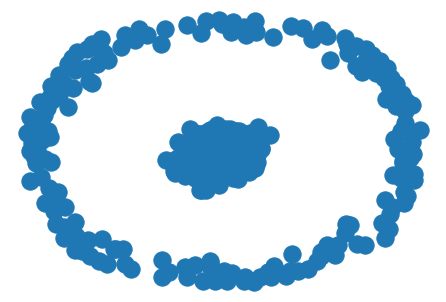

In [ ]:
# draw a small subgraph from G1
k = 1000
sampled_nodes = random.sample(G1.nodes, k)
sampled_graph = G1.subgraph(sampled_nodes)

nx.draw(sampled_graph)
plt.show()

Degree Centrality

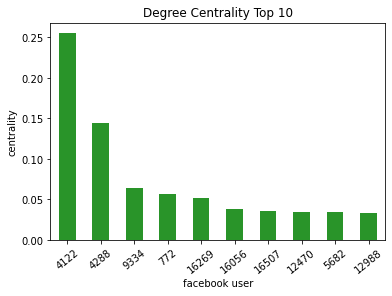

In [ ]:
def plot_centrality(keys, vals, title, colour):
    c = pd.DataFrame()
    c['facebook user'] = keys
    c['centrality'] = vals
    c = c.sort_values(by='centrality', ascending=False)
    c = c.drop(c.index[10:]) # leave only top 10 centralities

    # # get individual's name from their number
    # d = names.merge(c, on='Number') # JOIN operation on names and c
    # d = d.sort_values(by='Centrality', ascending=False)

    ax = c.plot.bar(x='facebook user', y='centrality', title=title, 
                    color=colour, alpha=0.84, rot=39, legend=False)
    ax.set_ylabel("centrality")

cent_dict = nx.degree_centrality(G1)
ks = cent_dict.keys()
vs = cent_dict.values()
# print(vs)
plot_centrality(ks, vs, "Degree Centrality Top 10", 'green')

Eigenvector Centrality

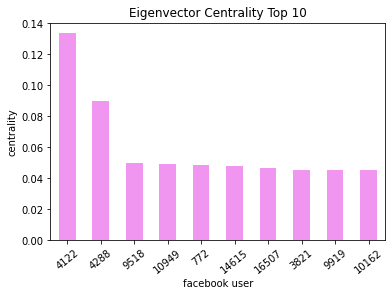

In [ ]:
eg_dict = nx.eigenvector_centrality(G1)
egks = eg_dict.keys()
egvs = eg_dict.values()
plot_centrality(egks, egvs, "Eigenvector Centrality Top 10", 'violet')

Degree Distribution

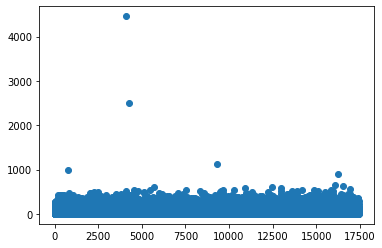

In [ ]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.scatter(G.nodes(), degrees)
    plt.show()

plot_degree_dist(G1)

Text(0, 0.5, 'Frequency')

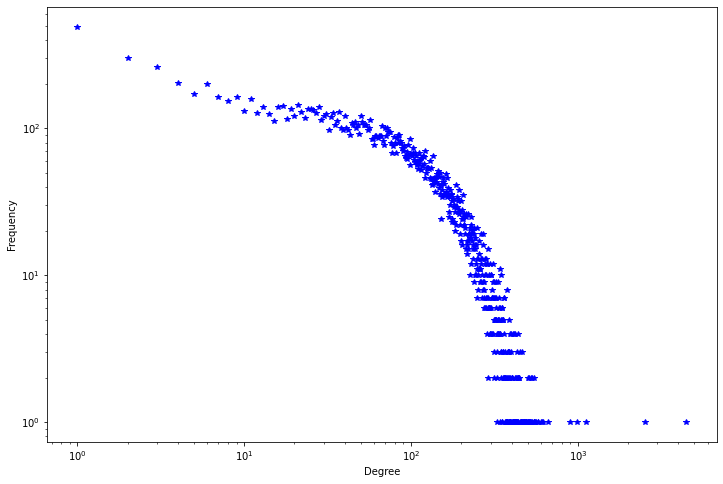

In [ ]:
def log_binning(counter_dict,bin_count=35):

    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    max_base = np.max([max_x,max_y])

    ks = counter_dict.keys()
    largers = [i for i in ks]
    min_x = np.log10(np.min(largers))
    bins = np.logspace(min_x,max_base,num=bin_count)
    bin_means_y = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.values())[0] / np.histogram(counter_dict.keys(),bins)[0])
    bin_means_x = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.keys())[0] / np.histogram(counter_dict.keys(),bins)[0])

    return bin_means_x,bin_means_y

# ba_c = nx.degree_centrality(G1)
# ba_c2 = dict(Counter(ba_c.values()))
# ba_x,ba_y = log_binning(ba_c2,50)

# plt.xscale('log')
# plt.yscale('log')
# plt.scatter(ba_x,ba_y,c='r',marker='s',s=50)
# plt.scatter(ba_c2.keys(),ba_c2.values(),c='b',marker='x')
# plt.xlim((1e-4,1e-1))
# plt.ylim((.9,1e4))
# plt.xlabel('Log degrees (normalized)')
# plt.ylabel('Frequency')
# plt.show()

degree_freq = nx.degree_histogram(G1)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'b*') 
# plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

Clustering Coefficient Distribution

In [7]:
clcc = nx.clustering(G1)


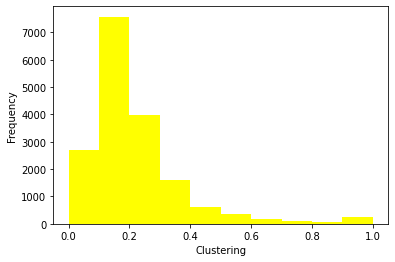

In [11]:
# cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(clcc.values()))
# node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]
fig, ax2 = plt.subplots(ncols=1, figsize=(6, 4))
# nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1)
# fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax2.hist(clcc.values(), bins=10, color='yellow')
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')

plt.show()

Connected Components

In [12]:
numconcom = nx.number_connected_components(G1)
print(f"Number of Connected Components in USC35: {numconcom}")

Number of Connected Components in USC35: 3


In [13]:
scc = [len(c) for c in sorted(nx.connected_components(G1), key=len, reverse=True)]
print("Size of Connected Components in USC35")
print(scc)

Size of Connected Components in USC35
[17440, 2, 2]


Shortest Paths

The average is  2.799542889545051


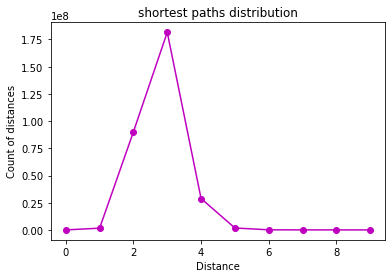

<Figure size 432x288 with 0 Axes>

In [15]:
def short_paths_dist(m):
  avg1 = 0
  # get the distance matrix, distances, and count of distances
  path1 = shortest_path(m, directed=False)
  dist_m, count_dist_m = np.unique(path1, return_counts=True, axis=None)
  # compute average
  path_cp = path1.copy()
  path_cp[~np.isfinite(path_cp)] = 0
  # path_cp = np.array(path_cp)
  avg1 = path_cp.sum()
  n = path_cp.shape[0]
  avg1 = avg1 / (n*(n-1))

  plt.title('shortest paths distribution')
  # plt.scatter(dist_m, count_dist_m)
  plt.plot(dist_m, count_dist_m, c='m', linestyle='-', marker='o')
  plt.xlabel("Distance")
  plt.ylabel("Count of distances")
  plt.figure()  
  print('The average is ' , avg1)

g2 = G1.copy()
msp = nx.to_scipy_sparse_matrix(g2, format='csc')
short_paths_dist(msp)